In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing DataSet

In [210]:
df=pd.read_csv("titanic.csv")

In [211]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Exploratory Data Analysis

In [212]:
print(df.shape)
print(df.size)
print(df.info())

(891, 12)
10692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [213]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [214]:
#Over all dataset null values
df.isnull().sum().sum()

np.int64(866)

In [215]:
#Overall dataset null value percentages
(df.isnull().sum()/df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [216]:
#Over all percentage
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

np.float64(8.099513655069211)

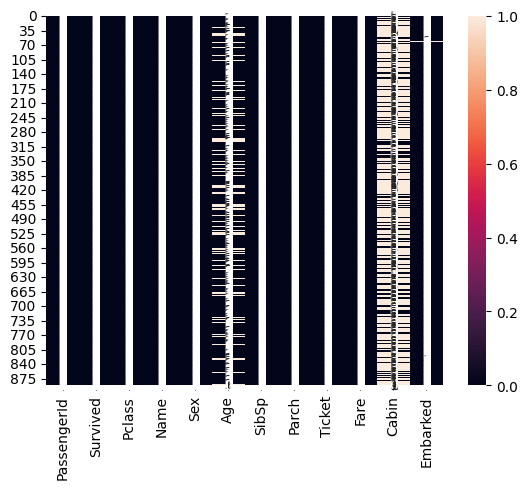

In [217]:
#Before REplacing the null values
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [218]:
#Fillin the missing values
df["Age"].fillna(df["Age"].mean(),inplace=True)

C:\Users\abhir\AppData\Local\Temp\ipykernel_10792\279979184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [219]:
df.select_dtypes(include="object").isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [220]:
for i in df.select_dtypes(include="object"):
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\abhir\AppData\Local\Temp\ipykernel_10792\2714397099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [221]:
#UnderStanding about the datasert
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [223]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [224]:
df["Cabin_"]=le.fit_transform(df[["Cabin"]])

C:\Users\abhir\Downloads\practice.py\Evolution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
df.drop(columns=["Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [226]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_
0,1,0,3,male,22.000000,1,0,7.2500,47
1,2,1,1,female,38.000000,1,0,71.2833,81
2,3,1,3,female,26.000000,0,0,7.9250,47
3,4,1,1,female,35.000000,1,0,53.1000,55
4,5,0,3,male,35.000000,0,0,8.0500,47
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,47
887,888,1,1,female,19.000000,0,0,30.0000,30
888,889,0,3,female,29.699118,1,2,23.4500,47
889,890,1,1,male,26.000000,0,0,30.0000,60


In [227]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [228]:
order=[["male","female"]]
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=order)
oe.fit(df[["Sex"]])
df["Gender"]=oe.transform(df[["Sex"]])

In [229]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_,Gender
0,1,0,3,male,22.000000,1,0,7.2500,47,0.0
1,2,1,1,female,38.000000,1,0,71.2833,81,1.0
2,3,1,3,female,26.000000,0,0,7.9250,47,1.0
3,4,1,1,female,35.000000,1,0,53.1000,55,1.0
4,5,0,3,male,35.000000,0,0,8.0500,47,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,47,0.0
887,888,1,1,female,19.000000,0,0,30.0000,30,1.0
888,889,0,3,female,29.699118,1,2,23.4500,47,1.0
889,890,1,1,male,26.000000,0,0,30.0000,60,0.0


In [230]:
df["No.Survived"]=df["Survived"]

In [231]:
df.drop(["Survived","Sex"],axis=1,inplace=True)

In [232]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_,Gender,No.Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,53.639731,0.352413,0.383838
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,23.568293,0.477990,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,47.000000,0.000000,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,47.000000,0.000000,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,47.000000,1.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,146.000000,1.000000,1.000000


In [233]:
df["No.Survived"].value_counts()

No.Survived
0    549
1    342
Name: count, dtype: int64

#Data Visualization

<Axes: >

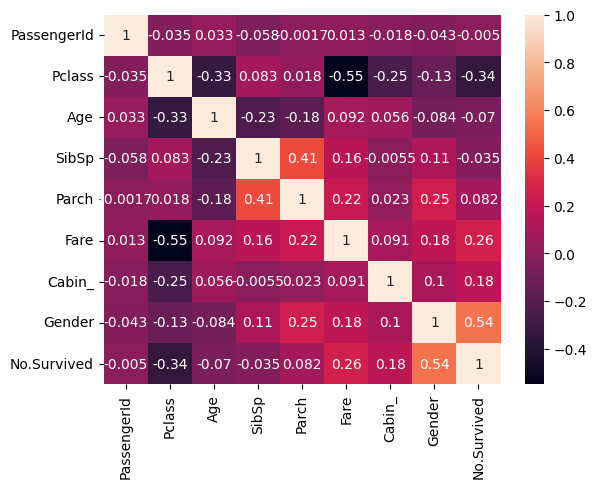

In [234]:
sns.heatmap(df.corr(),annot=True)

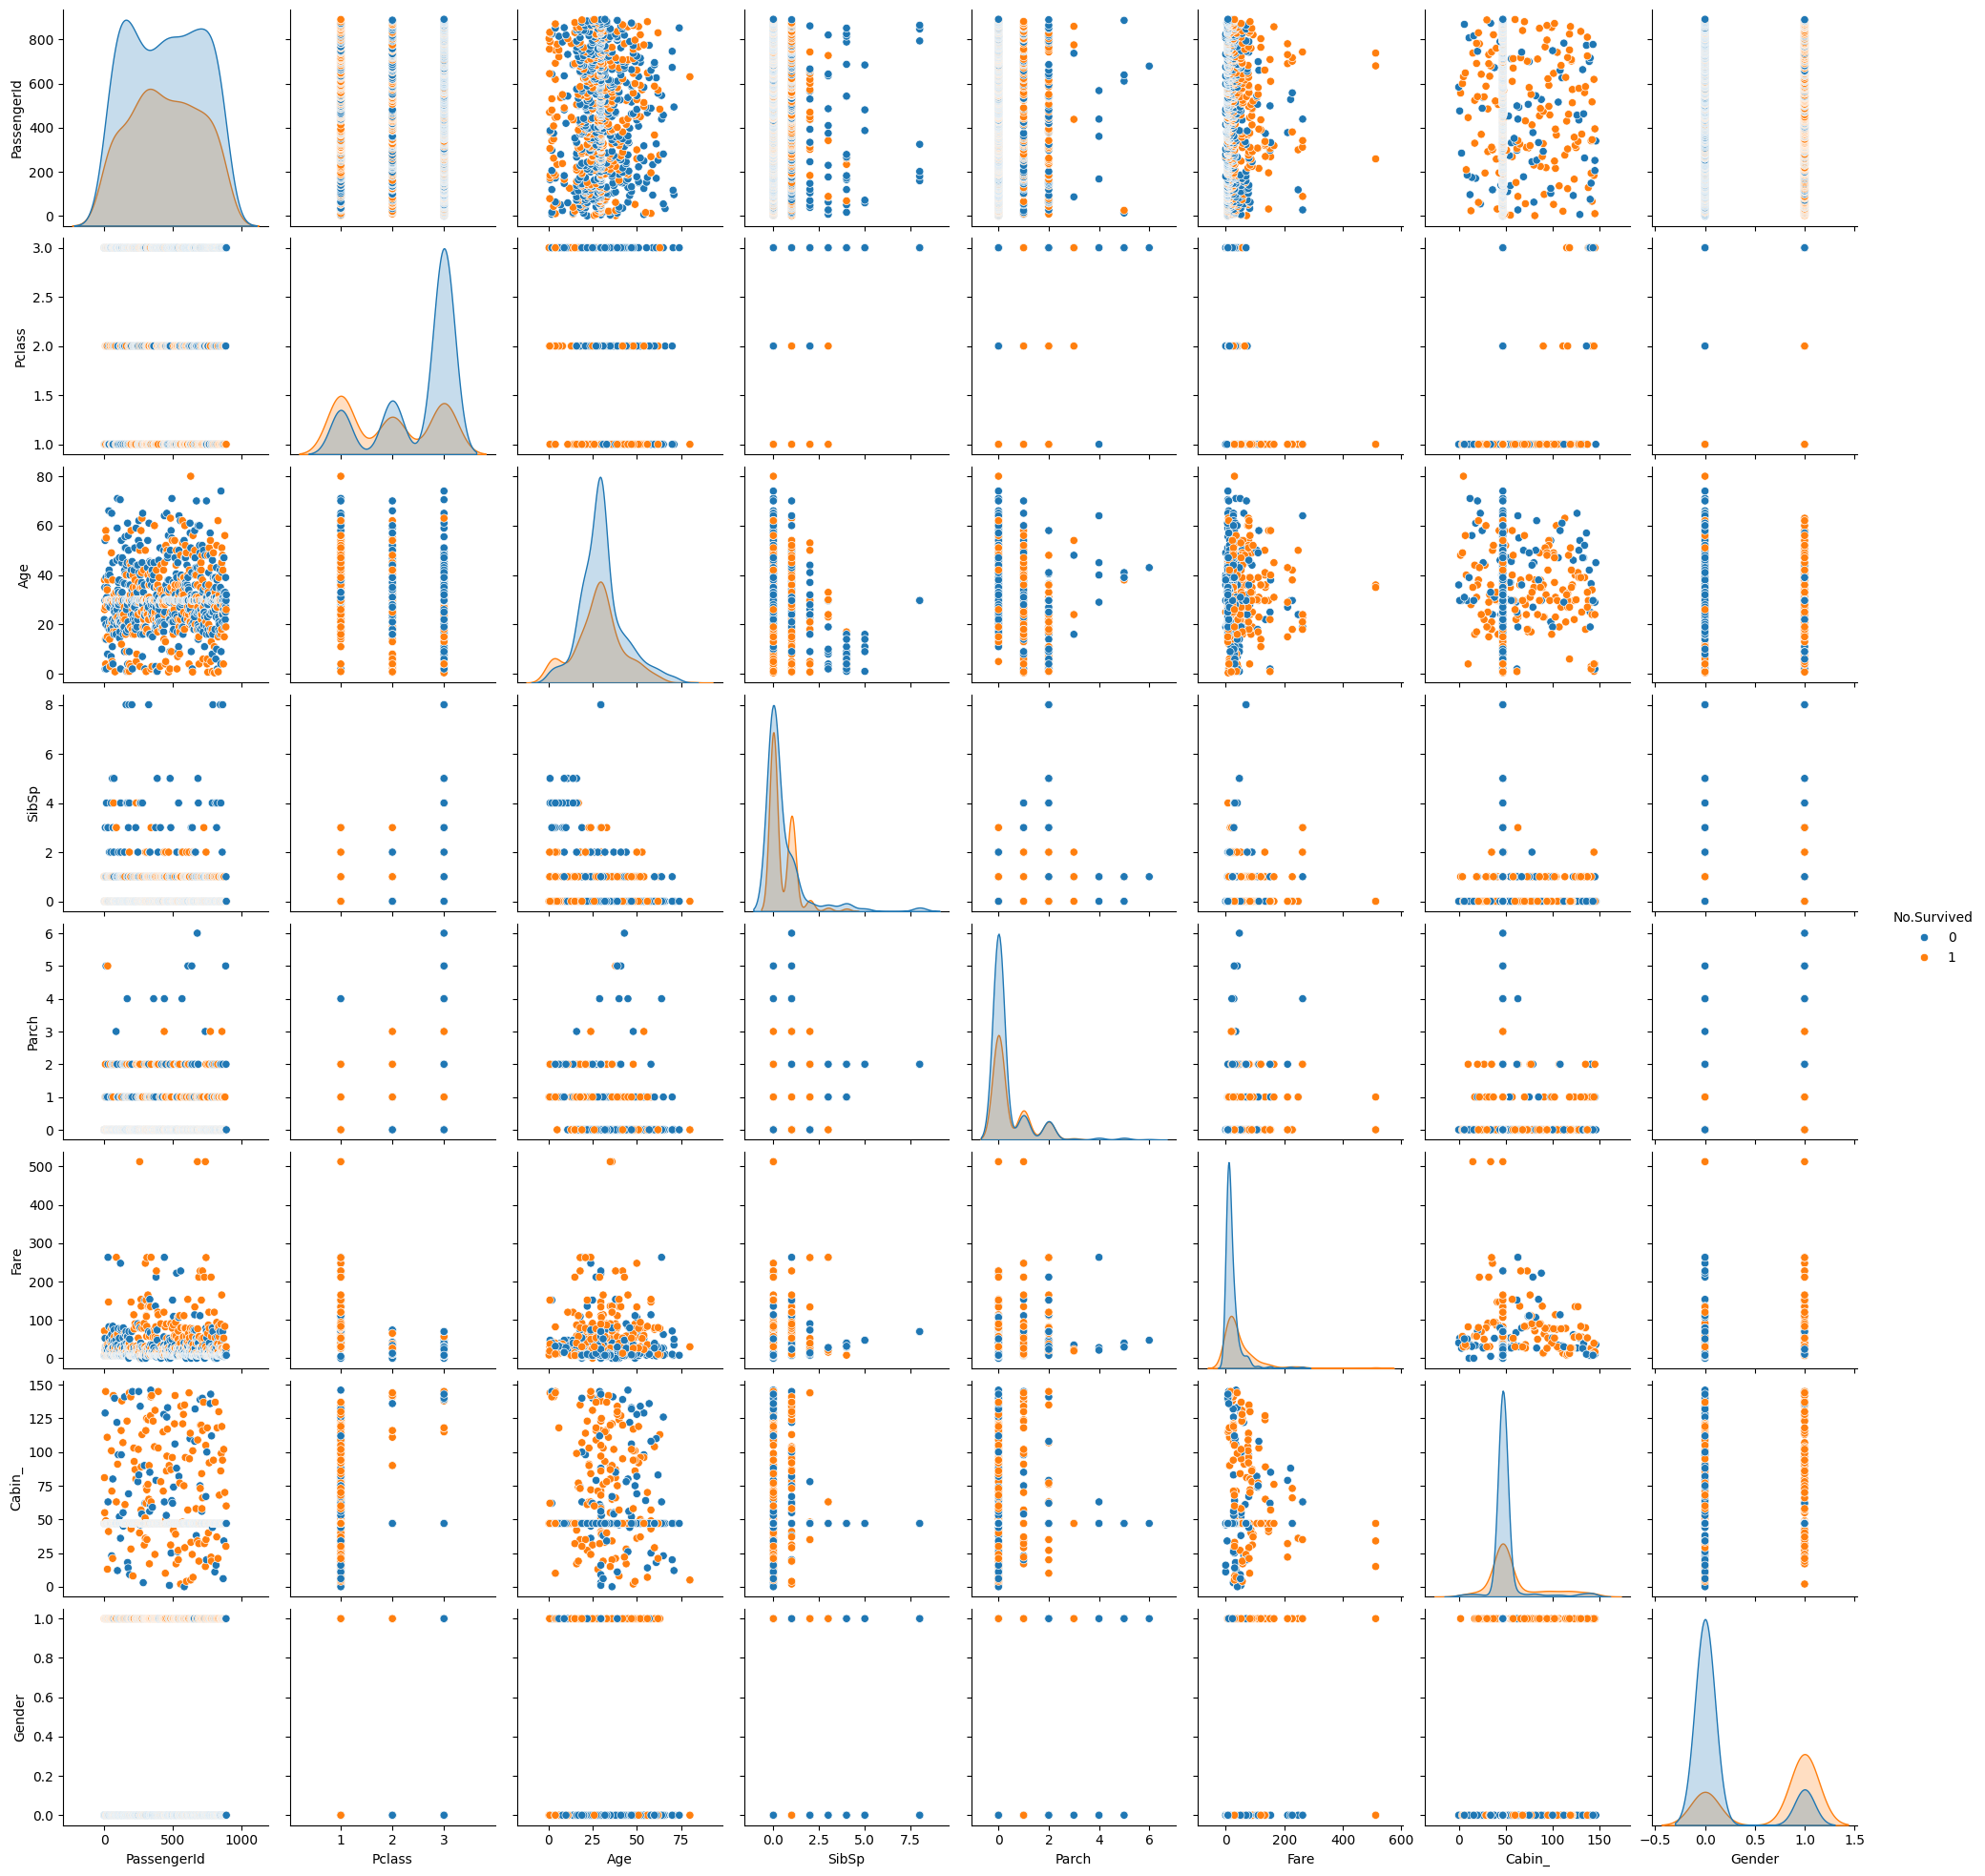

In [253]:
sns.pairplot(df,hue="No.Survived")

C:\Users\abhir\AppData\Local\Temp\ipykernel_10792\2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

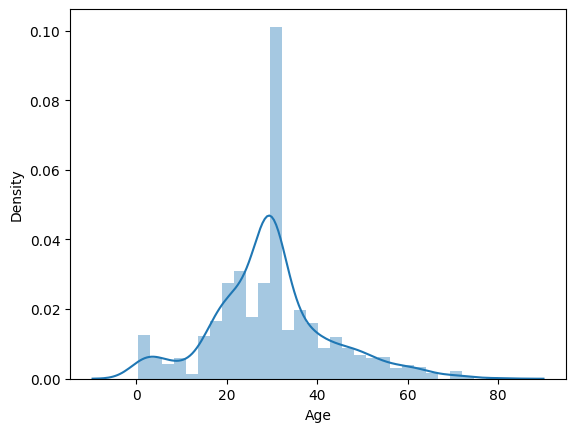

In [235]:
sns.distplot(df["Age"])

In [236]:
x=df.iloc[:,:-1]
y=df["No.Survived"]

In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [238]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [239]:
lr.fit(x_train,y_train)

C:\Users\abhir\Downloads\practice.py\Evolution\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [240]:
lr.score(x_test,y_test)*100

82.12290502793296

#Naive Bayes

In [241]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [242]:
gnb=GaussianNB()

In [243]:
gnb.fit(x_train,y_train)

GaussianNB()

In [244]:
gnb.score(x_test,y_test)*100

77.6536312849162

In [245]:
bnb=BernoulliNB()

In [246]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [247]:
bnb.score(x_test,y_test)*100

78.2122905027933

#Accuracy
#Confusion matrix
#F1 Score

In [248]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [249]:
accuracy_score(y_test,lr.predict(x_test))*100

82.12290502793296

In [250]:
cm=confusion_matrix(y_test,lr.predict(x_test))

<Axes: >

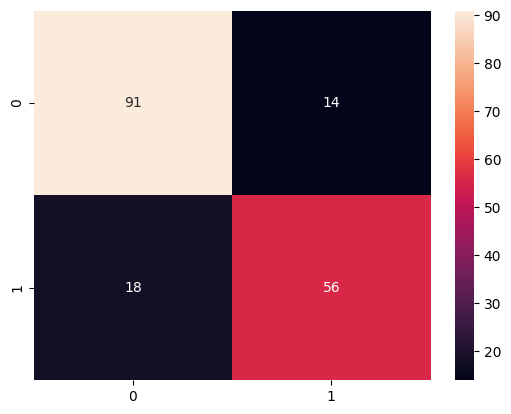

In [251]:
sns.heatmap(cm,annot=True)

In [252]:
f1_score(y_test,lr.predict(x_test))*100

77.77777777777779